# K - Nearest Neighbours

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np 
from warnings import filterwarnings
filterwarnings('ignore') 
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the files
df = pd.read_csv('telecom_customer.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
# Finding insights
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

- 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

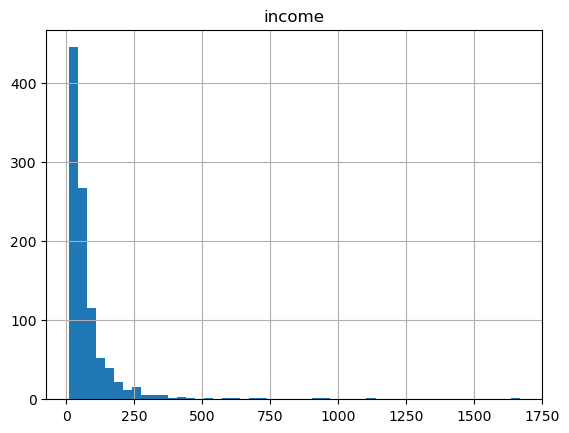

In [4]:
# Visualizing the data
df.hist(column = 'income', bins=50)

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

- To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array

In [6]:
# for X-variable
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [7]:
# for Y-Variable
y = df[['custcat']].values
y[0:5]

array([[1],
       [4],
       [3],
       [1],
       [3]], dtype=int64)

# Data Normalization

Data standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [17]:
# Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4) #'x' has to be Capitalized
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (800, 11) (800, 1)
Testing set: (200, 11) (200, 1)


In [18]:
# Defining the value of 'k'
k = 4 

In [23]:
# Training the model
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)


In [22]:
# Prediction
y_hat = neigh.predict(X_test)
y_hat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)


In [27]:
# Accuracy Evaluation
print('Train set accuracy:', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set accuracy:", metrics.accuracy_score(y_test, neigh.predict(X_test)))

Train set accuracy: 0.5475
Test set accuracy: 0.32



# Another example for practice:

In [31]:
# For k value as 6
k1 = 6
neigh1 = KNeighborsClassifier(n_neighbors=k1).f(X_train, y_train)
y_hat1 = neigh1.predict(X_test)

print('Training Accuracy:', metrics.accuracy_score(y_train, neigh1.predict(X_train)))
print("Testing Accuracy:", metrics.accuracy_score(y_test, neigh1.predict(X_test)))

Training Accuracy: 0.51625
Testing Accuracy: 0.31


# For 'n' number of 'k'

In [44]:
ks = 10  # maximum value of k
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)

for n in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[n - 1] = np.std(y_hat == y_test) / np.sqrt(y_hat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

# Plotting the model accuracy for the different no of neighbours

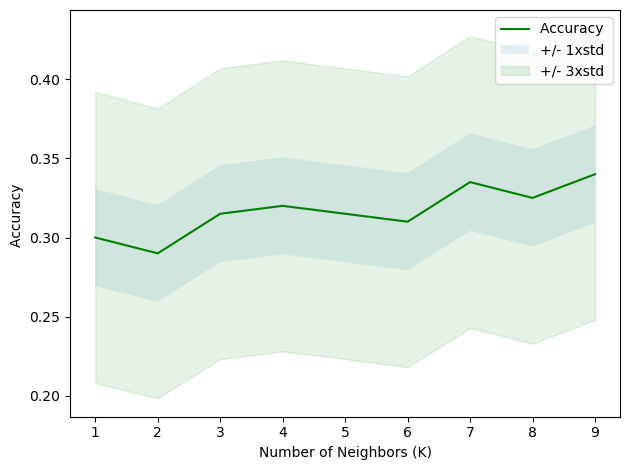

In [46]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [47]:
print('The best accuracy was:', mean_acc.max(), "and with the value of k as", mean_acc.argmax()+1)

The best accuracy was: 0.34 and with the value of k as 9
